### Dependencies

In [1]:
# Visualization Dependencies
from IPython.display import Image, SVG
import seaborn as sns
import os
import numpy as np

### Import and Shape Data

In [2]:
!pip install emnist

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# pip install emnist
# Import Dataset(s)
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [4]:
# Working with 'letters'
# Import 
from emnist import extract_training_samples
images_train, labels_train = extract_training_samples('letters')
from emnist import extract_test_samples
images_test, labels_test = extract_test_samples('letters')

In [5]:
# Check shape of training and testing data
print(images_train.shape)
print(labels_train.shape)
print(images_test.shape)
print(labels_test.shape)

(124800, 28, 28)
(124800,)
(20800, 28, 28)
(20800,)


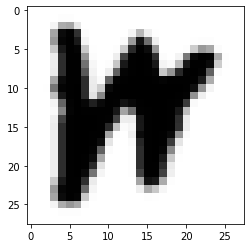

In [6]:
# Plot an image
import matplotlib.pyplot as plt
plt.imshow(images_train[0,:,:], cmap=plt.cm.Greys)

### Create and Evaluate Model

In [18]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

# Load EMNIST letters subset data
train_data = pd.read_csv('emnist-letters-train.csv', header=None)
test_data = pd.read_csv('emnist-letters-test.csv', header=None)

# Split into features and labels
x_train = train_data.iloc[:, 1:].values.astype('float32')
y_train = train_data.iloc[:, 0].values.astype('int32')
x_test = test_data.iloc[:, 1:].values.astype('float32')
y_test = test_data.iloc[:, 0].values.astype('int32')

# Normalize data
x_train /= 255
x_test /= 255

# Reshape data for CNN model
img_rows, img_cols = 28, 28
if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Convert labels to one-hot encoding
num_classes = 26
y_train = keras.utils.to_categorical(y_train - 1, num_classes)
y_test = keras.utils.to_categorical(y_test - 1, num_classes)

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [19]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop' , metrics=['accuracy'])

In [20]:
# Train model
batch_size = 128
epochs = 10
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_val, y_val))

Epoch 1/10
555/555 [==============================] - 82s 146ms/step - loss: 0.9629 - accuracy: 0.7110 - val_loss: 0.3617 - val_accuracy: 0.8875
Epoch 2/10
555/555 [==============================] - 99s 179ms/step - loss: 0.5065 - accuracy: 0.8412 - val_loss: 0.2841 - val_accuracy: 0.9099
Epoch 3/10
555/555 [==============================] - 101s 182ms/step - loss: 0.4134 - accuracy: 0.8726 - val_loss: 0.2519 - val_accuracy: 0.9188
Epoch 4/10
555/555 [==============================] - 101s 183ms/step - loss: 0.3692 - accuracy: 0.8841 - val_loss: 0.2393 - val_accuracy: 0.9236
Epoch 5/10
555/555 [==============================] - 101s 182ms/step - loss: 0.3553 - accuracy: 0.8892 - val_loss: 0.2484 - val_accuracy: 0.9250
Epoch 6/10
555/555 [==============================] - 102s 184ms/step - loss: 0.3416 - accuracy: 0.8941 - val_loss: 0.2261 - val_accuracy: 0.9288
Epoch 7/10
555/555 [==============================] - 107s 193ms/step - loss: 0.3348 - accuracy: 0.8982 - val_loss: 0.2487 - v

In [21]:
# Save Model
model.save("emnist_trained_CNN.h5")

In [22]:
# Load Model
from tensorflow.keras.models import load_model
model = load_model("emnist_trained_CNN.h5")

In [23]:
# Evaluate model on test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.26327982544898987
Test accuracy: 0.9158783555030823
